## mplstyle and DRY for storytelling in matplotlib

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import duckdb

# in python script
# Path(__file__).parent / "styles/base.mplstyle"

plt.style.use("styles/base.mplstyle")

df = pd.read_csv("data/jobs_in_data_2024.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


In [116]:
df.shape

(14199, 12)

In [117]:
df_job_categories = df["job_category"].value_counts()
df_job_categories

job_category
Data Science and Research         4675
Data Engineering                  3157
Data Analysis                     2204
Machine Learning and AI           2148
Leadership and Management          791
BI and Visualization               600
Data Architecture and Modeling     419
Data Management and Strategy       115
Data Quality and Operations         79
Cloud and Database                  11
Name: count, dtype: int64

In [118]:
type(df_job_categories) # we need series to use correct colors!

pandas.core.series.Series

## Visualizations

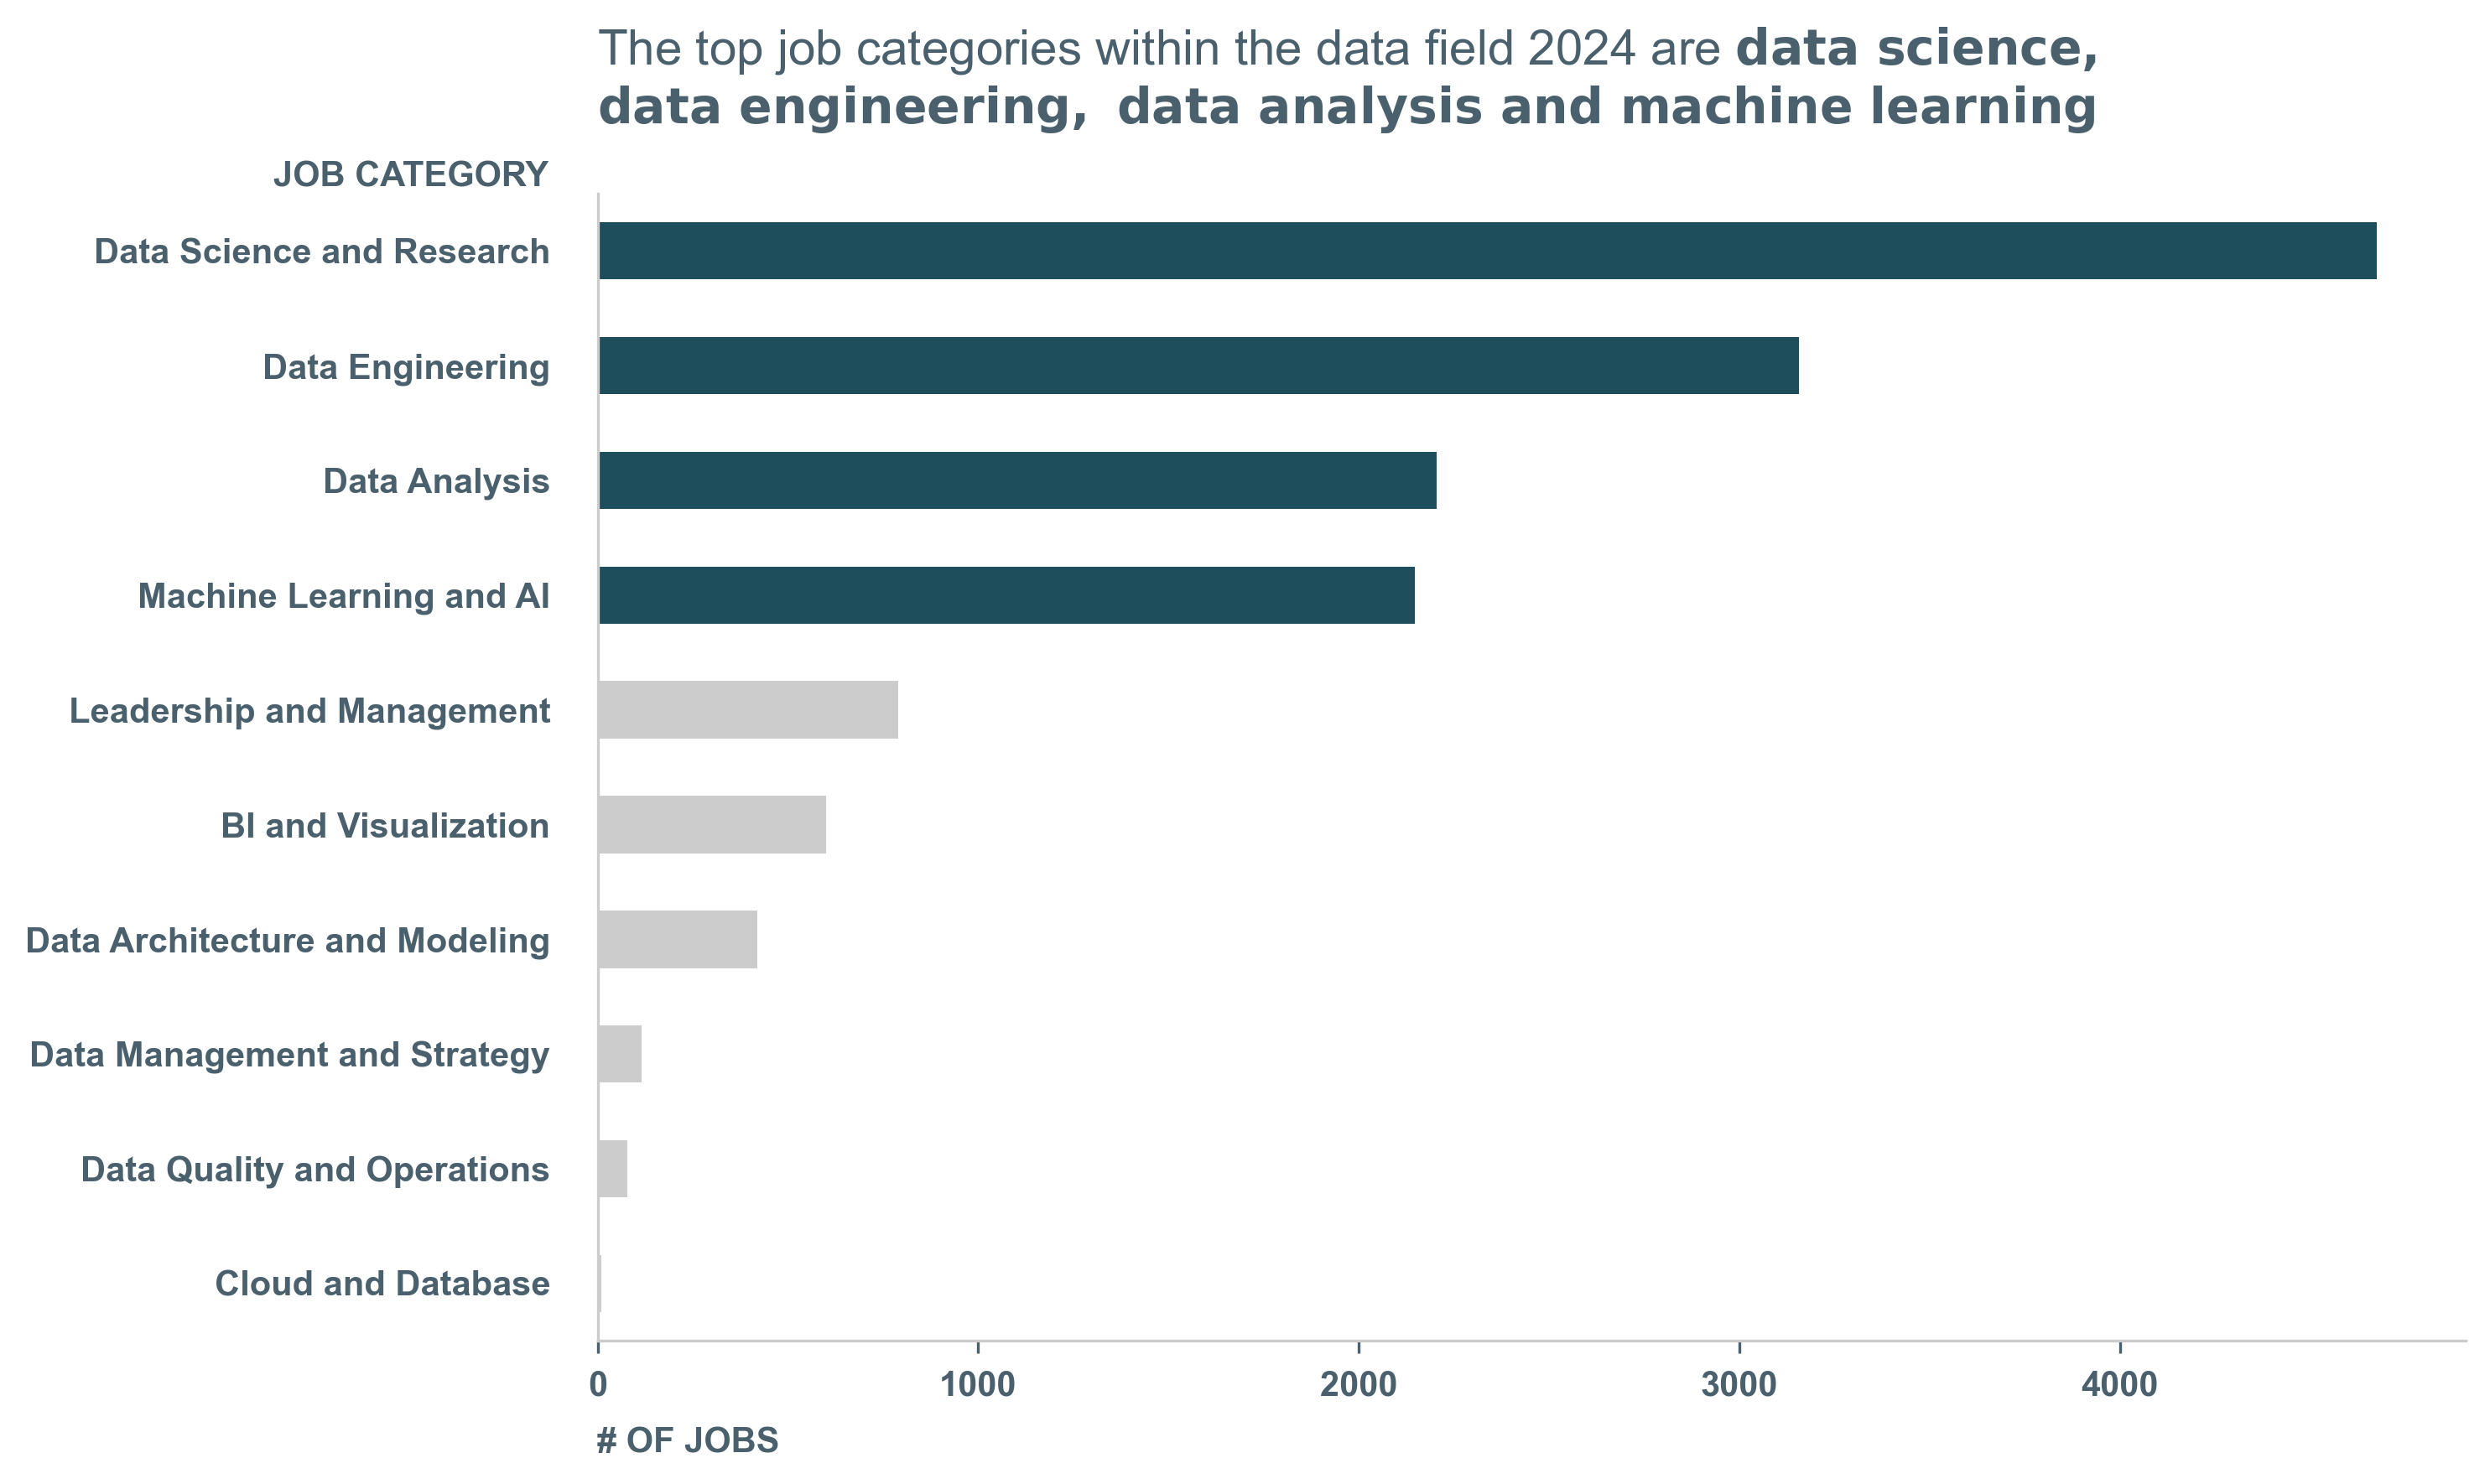

In [122]:
from charts_utils import horizontal_bar_options, save_fig_from_ax
from constants import BLUE_1, GRAY_1

colors = [GRAY_1]*len(df_job_categories)
colors[:4] = [BLUE_1] *4

ax = df_job_categories.plot(
    kind="barh", 
    color = colors
    #figsize=(10,8) # what is in python code overrides what is in .mplstyle
    )


ax = horizontal_bar_options(
    ax, 
    title="The top job categories within the data field 2024 are "
    + r"$\bf{data\ science},$"
    + "\n"
    + r"$\bf{data\ engineering},$"
    + r"$\bf{\ data\ analysis\ \text{and}\ machine\ learning}$",
    xlabel = "# OF JOBS",
    ylabel =  "JOB CATEGORY",
)

save_fig_from_ax(ax, "figures/number_data_jobs.png")
